### About Dataset

### Context

* There's a story behind every dataset and here's your opportunity to share yours.

### Content

#### Attribute Information:

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

* Weather data observations

* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

* RH : Relative Humidity in %: 21 to 90

* Ws :Wind speed in km/h: 6 to 29

* Rain: total day in mm: 0 to 16.8

* FWI Components

* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

* Drought Code (DC) index from the FWI system: 7 to 220.4

* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

* Buildup Index (BUI) index from the FWI system: 1.1 to 68

* Fire Weather Index (FWI) Index: 0 to 31.1

* Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

### Pre processing

+ Importing Librarys

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1,on_bad_lines='skip')
df.drop(df.index[[122,123,124]],axis=0,inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.columns=[i.strip() for i in df.columns] 

In [5]:
# df.rename(columns = {' RH' : 'RH', ' Ws' : 'Ws' , 'Rain ' : 'Rain' , 'Classes  ' : 'Classes'},inplace = True)

In [6]:
def missing_values_impute(df):
    for i in df:
        if df[i].dtypes=='O':
            mode=df[i].mode()[0]
            df[i].fillna(mode,inplace=True)
        else:
            median=df[i].median()
            df[i].fillna(median,inplace=True)

In [7]:
missing_values_impute(df)

In [8]:
# Checking the missingz values
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
def datatype_impute(df,columns,data_type):
    dt={key:data_type for key in columns}
    for i in columns:
        df[i]=df[i].str.replace(" ","")
    df=df.astype(dt,errors="ignore")
    print(df.dtypes)

In [10]:
def datatype_numeric_impute(df,columns):
    for i in columns:
        df[i]=df[i].str.replace(" ","")
        df[i]=df[i].apply(pd.to_numeric)
    print(df.dtypes)

In [11]:
columns=df.iloc[:0,:13]
data_type="float64"
datatype_numeric_impute(df,columns)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [12]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [13]:
df['Classes']=df["Classes"].str.strip()

In [14]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [15]:
df['Classes'].replace('fire',1,inplace=True)
df['Classes'].replace('not fire',0,inplace=True)

In [16]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [18]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [19]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.6 KB


In [21]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
dtype: int64

In [22]:
df_copy=df.copy()

# EDA

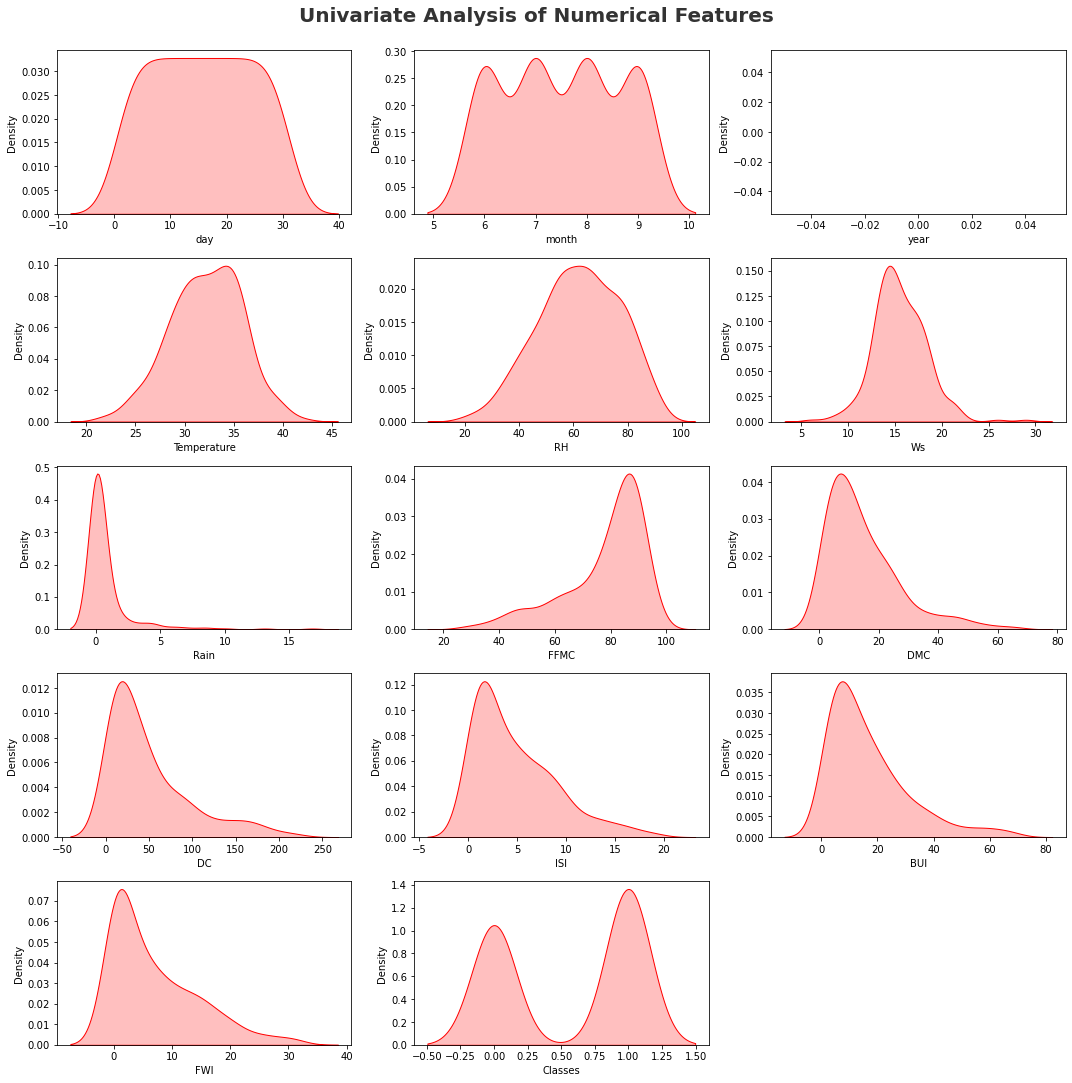

In [23]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for j,i in enumerate(df):
    plt.subplot(5,3,j+1)
    sns.kdeplot(x=df[i],shade=True, color='r')
    plt.tight_layout()

# Observations
1. Rain, DMC, DC, FWI are rightly skewed(log normal distribution)
2. In this binary class classification, Data set is imbalaned
3. There is no variance in the year attribute

# Multivariate analysis
* Multivariate analysis is the analysis of more than one variable.

In [24]:
df.drop(columns="year",inplace=True)

<Figure size 1080x1080 with 0 Axes>

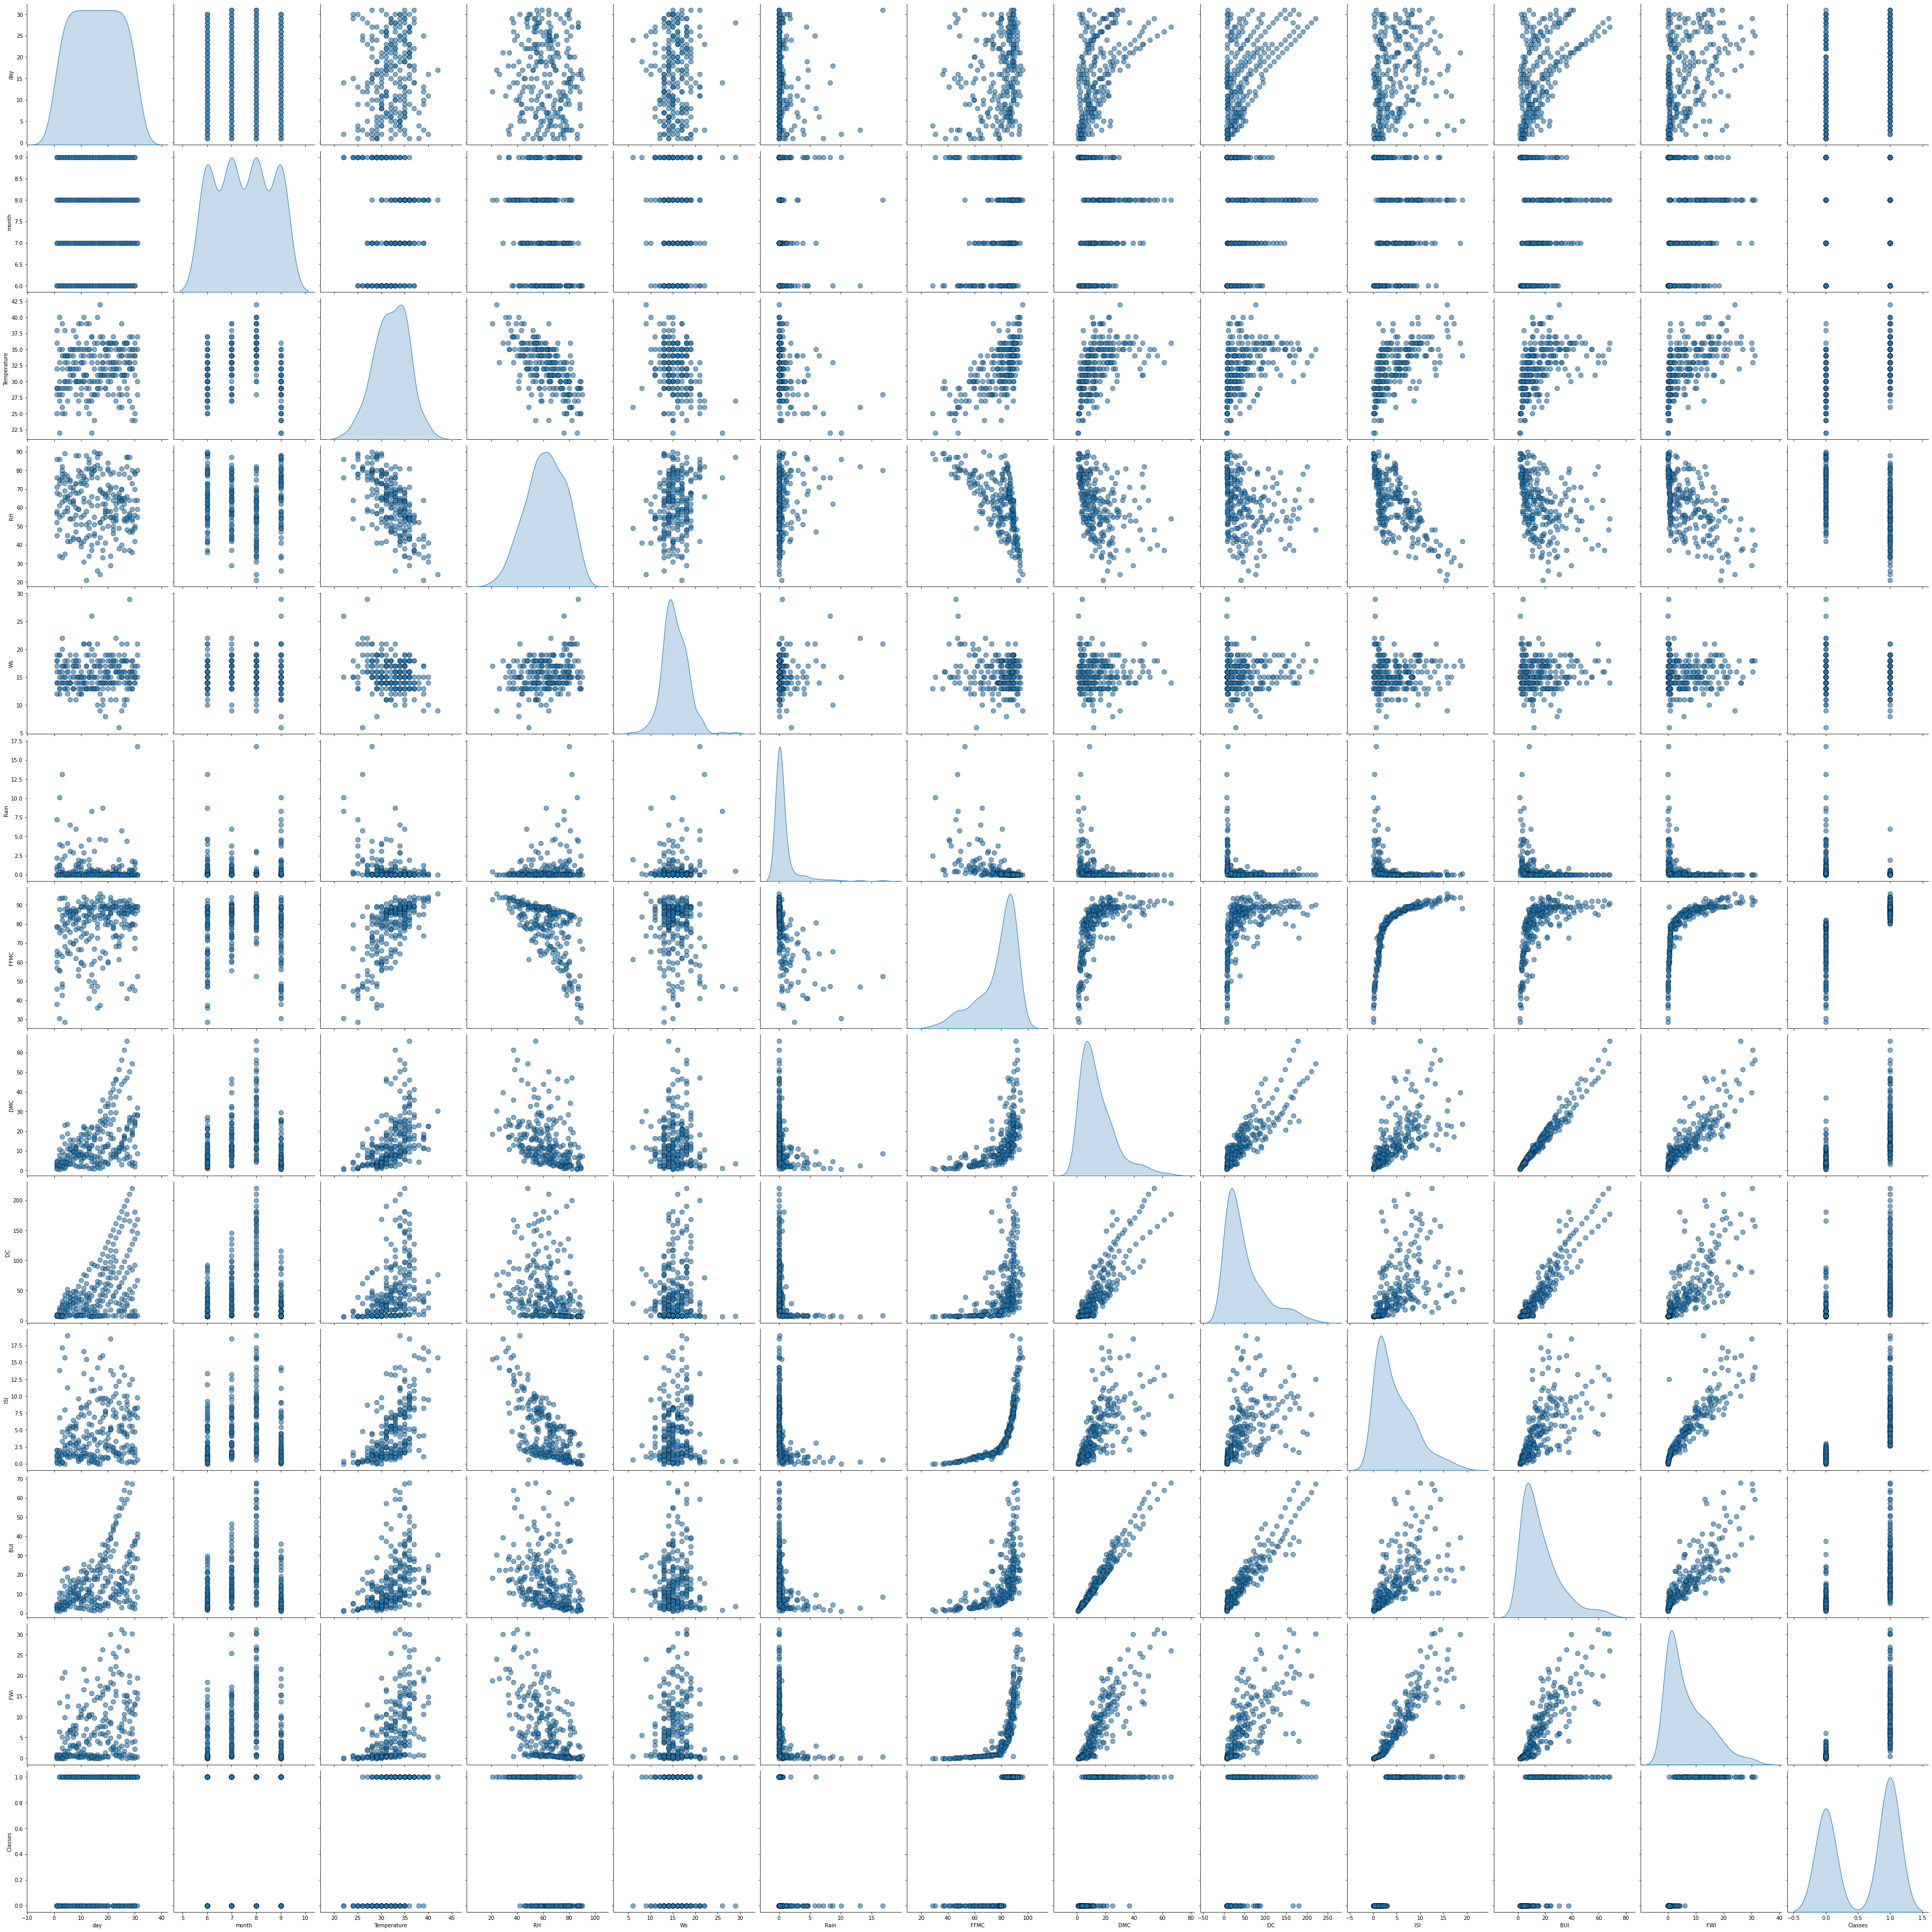

In [25]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [26]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,0.735511


In [27]:
df.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,7.788167e+01,4.641920e-16,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504
month,4.641920e-16,1.238683e+00,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346
Temperature,3.071308e+00,-2.386831e-01,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168
RH,-9.747689e+00,-6.275720e-01,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117
Ws,1.165621e+00,-1.296296e-01,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862
Rain,-1.980908e+00,7.860082e-02,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833
FFMC,2.834676e+01,2.485597e-01,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349
DMC,5.365433e+01,9.384774e-01,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791
DC,2.218594e+02,6.766276e+00,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976
ISI,6.548769e+00,2.866255e-01,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,99.199508,17.433281,37.714477,28.198196,1.525363


<AxesSubplot:>

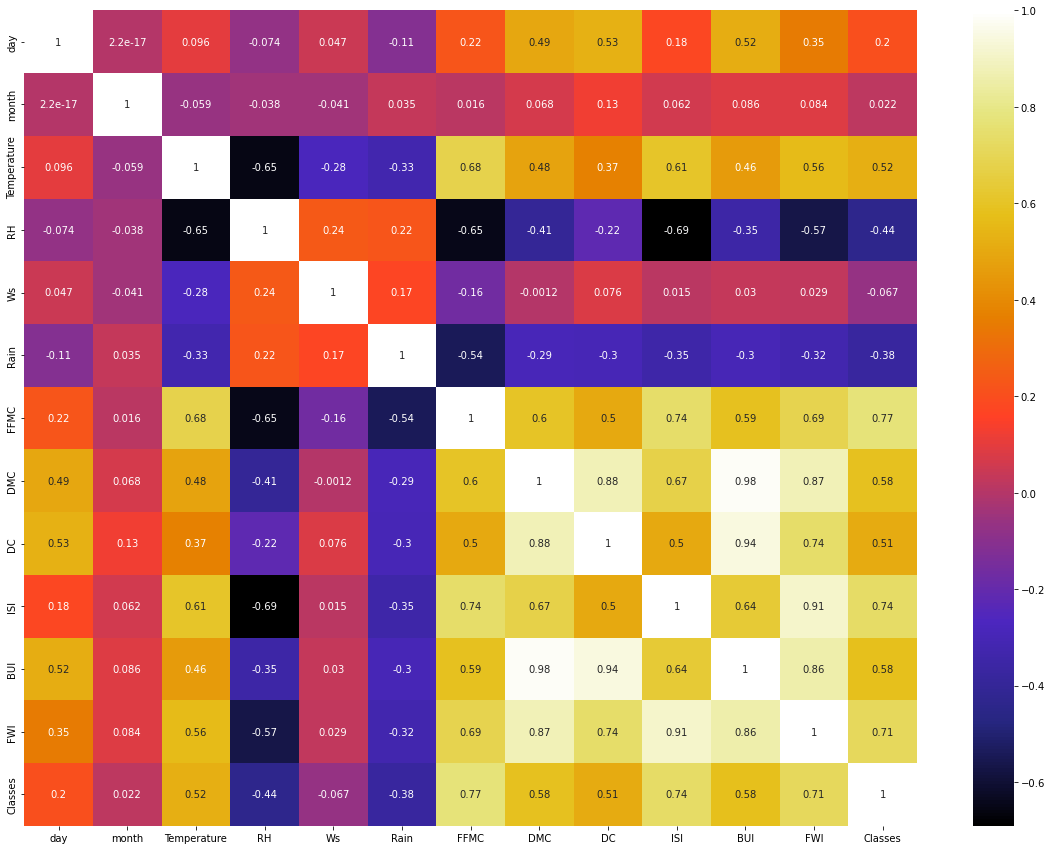

In [28]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)

# Check Multicollinearity in Numerical features
* Using VIF Variance Infliation Factor

In [29]:
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [30]:
vif_score(df)

,Features,VIF_score
0,day,1.482512
1,month,1.091362
2,Temperature,2.429788
3,RH,3.108823
4,Ws,1.334174
5,Rain,1.577441
6,FFMC,5.283862
7,DMC,77.256488
8,DC,25.437428
9,ISI,15.924178


* Usually we drop the features having VIF_score more 10

# Visualization of target column

Text(0, 0.5, 'Count')

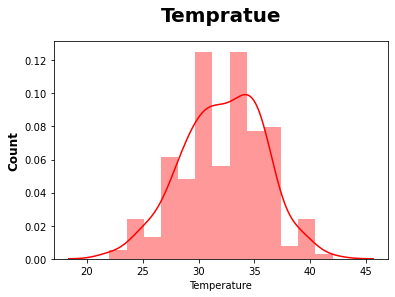

In [31]:
sns.distplot(df.Temperature, kde=True, color='r')
plt.title("Tempratue", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)

# Outliers 

In [32]:
df["Temperature"]

0      29
1      29
2      26
3      25
4      27
       ..
242    30
243    28
244    27
245    24
246    24
Name: Temperature, Length: 244, dtype: int64

In [33]:
df.drop(columns=["Temperature"],inplace=True)

<AxesSubplot:>

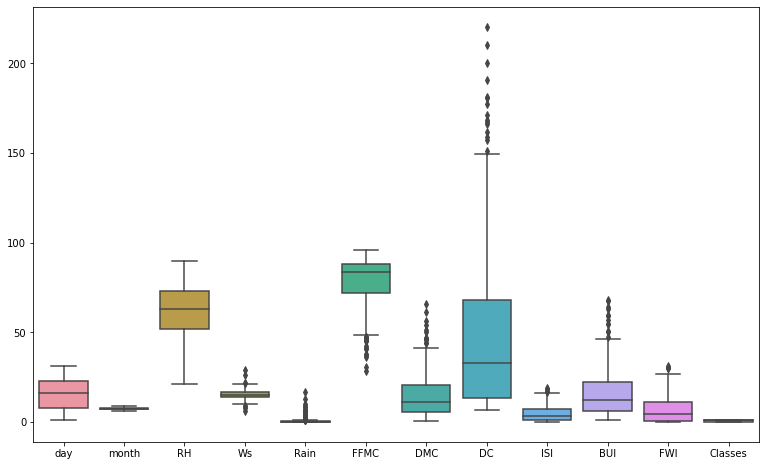

In [34]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df)

In [35]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence 

In [36]:
columns=df.columns

In [37]:
for col in columns:
    outliers_imputation_mild(df,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
____________________________________________
IQR: 5.9
Lower Fence ISI: -7.450000000000001
Upper Fence ISI: 16.150000000000002
_______________________

<AxesSubplot:>

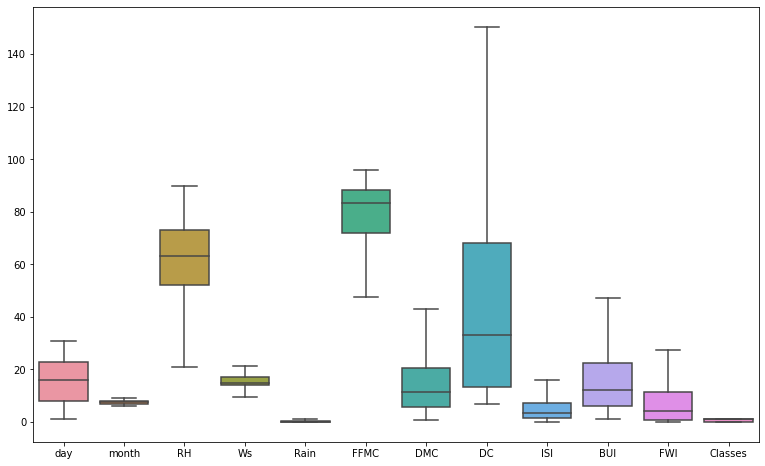

In [38]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df,)

In [39]:
df

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,65.0,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,87.0,15.0,1.25,47.7375,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,87.0,21.5,0.50,47.7375,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,54.0,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7,0.0


#### Splitting the data in train and test

In [40]:
X=df
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,65.0,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,87.0,15.0,1.25,47.7375,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,87.0,21.5,0.50,47.7375,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,54.0,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7,0.0


In [41]:
y=df_copy["Temperature"]
y

0      29
1      29
2      26
3      25
4      27
       ..
242    30
243    28
244    27
245    24
246    24
Name: Temperature, Length: 244, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=90)

In [43]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
85,25.0,8.0,60.0,15.0,0.00,88.9,43.175,150.4625,8.20,47.3125,20.3000,1.0
63,3.0,8.0,63.0,14.0,0.30,76.6,5.700,10.0000,1.70,5.5000,0.8000,0.0
175,21.0,7.0,29.0,18.0,0.00,93.9,39.600,80.6000,16.15,39.5000,27.3875,1.0
11,12.0,6.0,81.0,19.0,0.00,84.0,13.800,61.4000,4.80,17.7000,7.1000,1.0
231,15.0,9.0,51.0,13.0,0.00,88.7,16.000,50.2000,6.90,17.8000,9.8000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,7.0,8.0,69.0,16.0,0.00,86.5,15.500,48.6000,5.50,17.2000,8.0000,1.0
162,8.0,7.0,47.0,18.0,1.25,80.8,9.800,9.7000,3.10,9.4000,3.0000,1.0
114,23.0,9.0,54.0,11.0,0.50,73.7,7.900,30.4000,1.20,9.6000,0.7000,0.0
160,6.0,7.0,42.0,15.0,0.30,84.7,15.500,45.1000,4.30,16.7000,6.3000,1.0


In [44]:
scalar=StandardScaler()

In [45]:
X_train=scalar.fit_transform(X_train)

In [46]:
X_test=scalar.transform(X_test) 

#### Assumptions of Linear Regression

1. There shoud be some linear relationship between y (dependent/label) and X (Independent/Features) variables.
2. Mean of residual(predicted value) should be zero.
3. Error terms (i.e c) are not suppose to be correalted.
4. X and residual are suppose to be uncorrelated (# Exogenity).
5. Error terms must show constant variance (#Homoscedascity).
6. There should not be any Multicollinearity (Relationship between features and features).
7. Error terms are suppose to be Normally Distributed

#### Model Training 

In [47]:
lin_reg=LinearRegression()

In [48]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [49]:
# All the slope 
lin_reg.coef_

array([-0.50315337, -0.22033804, -0.94864826, -0.56668199,  0.73291228,
        1.48763466,  0.53420332,  0.81441427,  1.49483299,  0.6799853 ,
       -2.11281243, -0.04709327])

In [50]:
# Error or C value or Theeta0
lin_reg.intercept_

32.13661202185792

In [51]:
# Prediction for the test data
lin_reg.predict(X_test)

array([34.4192498 , 38.64482162, 31.77287503, 31.00929656, 34.64299435,
       36.66971064, 33.36864499, 27.186799  , 25.79533304, 33.72987514,
       33.45422093, 33.99679756, 31.76687254, 29.59377862, 35.27314457,
       34.34989023, 32.27552689, 32.78593446, 28.33945802, 29.61817875,
       30.85232682, 23.22860074, 35.0192596 , 30.49320542, 27.57509474,
       31.22566302, 34.62919803, 29.76486015, 27.77946358, 36.17822976,
       32.60377696, 36.80202125, 33.89889592, 33.21652666, 35.49323161,
       32.69775088, 38.17401912, 33.31696882, 30.08998825, 28.74574038,
       33.12176325, 30.88280803, 26.49152829, 33.39082838, 32.90562743,
       35.65060169, 37.98427798, 32.08047409, 34.06343911, 31.35383275,
       29.65723023, 33.62355216, 32.88954959, 25.21943228, 34.51427594,
       35.71662625, 25.50780828, 32.1703921 , 31.58807382, 30.11889484,
       32.59007958])

In [52]:
y_pred=lin_reg.predict(X_test)

Text(0, 0.5, 'Test Preadicted Data')

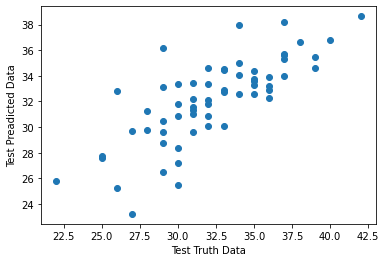

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Preadicted Data")

In [54]:
# residuals
resudal=y_test-y_pred

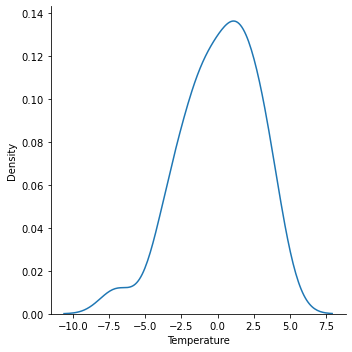

In [55]:
sns.displot(resudal,kind="kde")

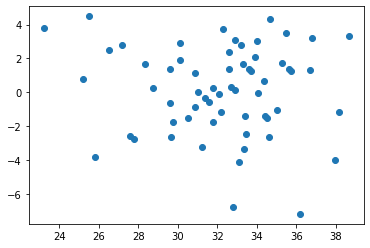

In [56]:
# Scatter plot with residual and prediction
# Uniform distribution
plt.scatter(y_pred,resudal)

In [57]:
# Performance metrices
print("Means Squared Error is",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error is",np.square(mean_absolute_error(y_test,y_pred)))

Means Squared Error is 6.6987053450802705
Mean Absolute Error is 2.109507579933567
Root Mean Squared Error is 4.450022229797176


In [58]:
lin_reg.score(X_test,y_test)

0.5848453932537694

In [59]:
r2_score(y_test,y_pred)

0.5848453932537694

In [60]:
# Creating a function for adjusted R-square
def adjusted_r2(x,y):
    r2=lin_reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [61]:
adjusted_r2(X_test,y_test)

0.4810567415672117

### Regularization

1. LASSO (L1) (Least Absolute Shrinkage and Selection Output) 

In [62]:
lassocv=LassoCV(alphas=np.random.uniform(0,10,50),cv=50,max_iter=100000)
lassocv.fit(X_train,y_train)

LassoCV(alphas=array([0.39118964, 3.8388276 , 0.99202439, 7.49718117, 5.87877459,
       9.18707362, 4.39384405, 8.04280961, 7.65989878, 2.50728391,
       4.44839347, 9.93150903, 5.54612956, 7.63506934, 2.33486992,
       7.88220797, 6.55477967, 1.017515  , 8.88161386, 9.84184594,
       2.34272147, 1.58415335, 7.54148451, 8.73541678, 7.13041678,
       1.48327526, 4.57599485, 9.44836385, 4.53921021, 8.55065918,
       8.47381038, 9.45348104, 5.60429753, 9.16525521, 0.66822188,
       6.23442629, 8.88314824, 0.4635021 , 9.81896966, 1.13781645,
       6.85193062, 8.81253401, 6.91943101, 2.46829382, 4.89822871,
       8.10205539, 9.12965199, 8.32172603, 3.72819857, 3.4897655 ]),
        cv=50, max_iter=100000)

In [63]:
lassocv.alpha_

0.39118963797062256

In [64]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.39118963797062256)

In [65]:
lasso.score(X_test,y_test)

0.5492085647635282

In [66]:
# Ridge Regression

In [67]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=50)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([7.7096591 , 9.35643618, 4.37685072, 3.10149146, 0.72119122,
       2.10726878, 4.09495309, 2.76046958, 7.79226242, 2.07309295,
       2.42667998, 8.28580314, 2.44547116, 7.47634326, 7.37130501,
       8.44451734, 4.82576135, 8.65922477, 8.05113987, 5.449523  ,
       3.08156265, 2.39181084, 8.07141527, 8.81597277, 7.90841849,
       5.86918014, 3.66080591, 1.60937173, 9.72322353, 7.17961817,
       6.80476303, 9.28148579, 2.36906334, 0.61904169, 3.79532529,
       9.62343255, 8.9994995 , 0.62151686, 4.0731852 , 8.29889262,
       1.06510175, 8.98975646, 2.02596947, 8.88047498, 2.90357519,
       7.29454089, 2.01196742, 2.20808951, 5.20309631, 6.36678201]),
        cv=50)

In [68]:
ridge=Ridge(alpha=ridgecv.alpha_)

In [69]:
ridge.fit(X_train,y_train)

Ridge(alpha=9.723223531000523)

In [70]:
ridge.score(X_test,y_test)

0.598220440301054

In [71]:
elasticnetcv=ElasticNetCV(alphas=np.random.uniform(0,10,50),cv=50)

In [72]:
elasticnetcv.fit(X_train,y_train)

ElasticNetCV(alphas=array([7.07535221, 0.09249475, 2.23081356, 0.48857496, 5.00341761,
       8.56470351, 6.14679215, 5.57078207, 3.05744495, 3.03804367,
       5.57027848, 9.48935724, 6.88544044, 0.01816186, 9.13091384,
       1.94069024, 7.33856354, 4.14779583, 6.67097676, 5.23822422,
       0.2197548 , 2.63039799, 7.89612458, 7.50353421, 3.51608987,
       6.67870944, 1.87589097, 9.5173668 , 6.44758909, 1.21747455,
       0.01932534, 0.62593276, 4.11355218, 8.62128128, 0.79339706,
       8.63905094, 2.70417159, 3.31443667, 9.86488784, 1.45434699,
       5.09822321, 8.02337809, 3.2777343 , 8.43893574, 9.98357985,
       8.60835865, 0.03632966, 2.84393045, 0.02466981, 0.32567381]),
             cv=50)

In [73]:
elasticnetcv.alpha_

0.036329664764409575

In [74]:
elasticnet=ElasticNet(alpha=elasticnetcv.alpha_,random_state=100)

In [75]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.036329664764409575, random_state=100)

In [76]:
elasticnet.score(X_test,y_test)

0.5984709102206769

In [77]:
# parameter={
#     "criterion":["squared_error", "friedman_mse", "absolute_error"],
#     "splitter":["best", "random"],
#     "max_depth":[1000,2000,3000,4000],
#     "min_samples_split":[1,2,3,4],
#     "min_samples_leaf":[1,2,3,4],
#     "ccp_alpha":np.random.rand(15),
# }

In [79]:
# grid=GridSearchCV(estimator=dt,param_grid=parameter,n_jobs=4)

In [80]:
# grid.fit(X_train,y_train)

In [81]:
# grid.best_params_

In [82]:
dt=DecisionTreeRegressor(ccp_alpha=0.0429080702995831,criterion="squared_error",max_depth=1000,
                        min_samples_leaf=3, min_samples_split=2, splitter="random")

In [83]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0429080702995831, max_depth=1000,
                      min_samples_leaf=3, splitter='random')

In [84]:
y_pred=dt.predict(X_test)

In [85]:
r2_score(y_test,y_pred)

0.41137051071677855

In [86]:
rf=RandomForestRegressor(n_estimators=100,random_state=103)

In [87]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=103)

In [88]:
rf.score(X_test,y_test)

0.6508797485009994

In [89]:
# paramaters={
#     "n_estimators":[105,106,110,120,130],
#     "criterion":["squared_error", "absolute_error", "poisson"],
#     "max_depth":[1000,2000,3000,4000,5000],
#     "min_samples_split":[2,3,4,5,6,7,10,15],
#     "min_samples_leaf":[1,2,3,4,5,6,7,10,15],
#     "min_weight_fraction_leaf":[.1,.2,.3,.4,.5,.6,.8],
#     "random_state":[30,50,80,90,100,110,150],
#     "ccp_alpha":np.random.rand(15),
#     "random_state":[103,104,105]
# }

In [90]:
grid=GridSearchCV(estimator=rf,param_grid=paramaters,n_jobs=4)

In [ ]:
grid.fit(X_train,y_train)